# Injecting a Watermark into a Video

### Objective: Inject a watermark into a video
In this notebook i attempt to inject a transparent watermark into a video. The watermark is a png image with transparent background. The watermark is injected into the video by overlaying the watermark on the video frame by frame. The watermark is overlayed on the video frame by frame using the following steps:
1. Read the video frame by frame
2. Resize the watermark to the size of the video frame
3. Overlay the watermark on the video frame
4. Write the video frame to the output video buffer
5. Repeat steps 1-4 for all the video frames
6. Save the output video buffer to a file
7. Display the output video with watermark transparently overlayed on the video

In [59]:
import cv2
import numpy as np

def add_transparent_image(background, foreground, x_offset=None, y_offset=None):
    bg_h, bg_w, bg_channels = background.shape
    fg_h, fg_w, fg_channels = foreground.shape
    assert bg_channels == 3, f'background image should have exactly 3 channels (RGB). found:{bg_channels}'
    assert fg_channels == 4, f'foreground image should have exactly 4 channels (RGBA). found:{fg_channels}'
    # center by default
    if x_offset is None: x_offset = (bg_w - fg_w) // 2
    if y_offset is None: y_offset = (bg_h - fg_h) // 2
    w = min(fg_w, bg_w, fg_w + x_offset, bg_w - x_offset)
    h = min(fg_h, bg_h, fg_h + y_offset, bg_h - y_offset)
    if w < 1 or h < 1: return
    # clip foreground and background images to the overlapping regions
    bg_x = max(0, x_offset)
    bg_y = max(0, y_offset)
    fg_x = max(0, x_offset * -1)
    fg_y = max(0, y_offset * -1)
    foreground = foreground[fg_y:fg_y + h, fg_x:fg_x + w]
    background_subsection = background[bg_y:bg_y + h, bg_x:bg_x + w]
    # separate alpha and color channels from the foreground image
    foreground_colors = foreground[:, :, :3]
    alpha_channel = foreground[:, :, 3] / 255  # 0-255 => 0.0-1.0
    # construct an alpha_mask that matches the image shape
    alpha_mask = np.dstack((alpha_channel, alpha_channel, alpha_channel))
    # combine the background with the overlay image weighted by alpha
    composite = background_subsection * (1 - alpha_mask) + foreground_colors * alpha_mask
    # overwrite the section of the background image that has been updated
    background[bg_y:bg_y + h, bg_x:bg_x + w] = composite

def InjectWatermarkInVideo(position, video_path, watermark_path, output_path,opacity):
    # make watermark transparent
    watermark = cv2.imread(watermark_path, cv2.IMREAD_UNCHANGED)
    watermark = cv2.resize(watermark, (100, 100))    
                     
    video = cv2.VideoCapture(video_path)
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = video.get(cv2.CAP_PROP_FPS)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # allows to set position of watermark
    match position:
        case 'top_left':
            position = (0, 0)
        case 'top_right':
            position = (width - watermark.shape[1], 0)
        case 'bottom_left':
            position = (0, height - watermark.shape[0])
        case 'bottom_right':
            position = (width - watermark.shape[1], height - watermark.shape[0])
        case 'center':
            position = (width//2 - watermark.shape[1]//2, height//2 - watermark.shape[0]//2)
        case 'bottom-center':
            position = (width//2 - watermark.shape[1]//2, height - watermark.shape[0])
        case 'top-center':
            position = (width//2 - watermark.shape[1]//2, 0)
        case 'left-center':
            position = (0, height//2 - watermark.shape[0]//2)
        case 'right-center':
            position = (width - watermark.shape[1], height//2 - watermark.shape[0]//2)
        case _:
            position = position

    # while video is running
    while True:
        # read frame by frame
        ret, frame = video.read()
        if ret == True:
            # add watermark to frame
            add_transparent_image(frame, watermark, position[0], position[1])
            # write frame to output video
            video_writer.write(frame)                         
        else:
            break
    video.release()
    video_writer.release()
    cv2.destroyAllWindows()
    

InjectWatermarkInVideo('bottom-center', 'video.mp4', 'watermarksample.png', 'output.mp4', 1)  

### Conclusion

In this notebook, we have learned how to inject a watermark into a video using OpenCV. Now i can successfully inject a watermark into a video. The use case of this technique was to brand a video with a logo or a watermark. This technique can be used to protect the video from being copied or used without the permission of the owner.  

#### Input 
```
video.mp4
```

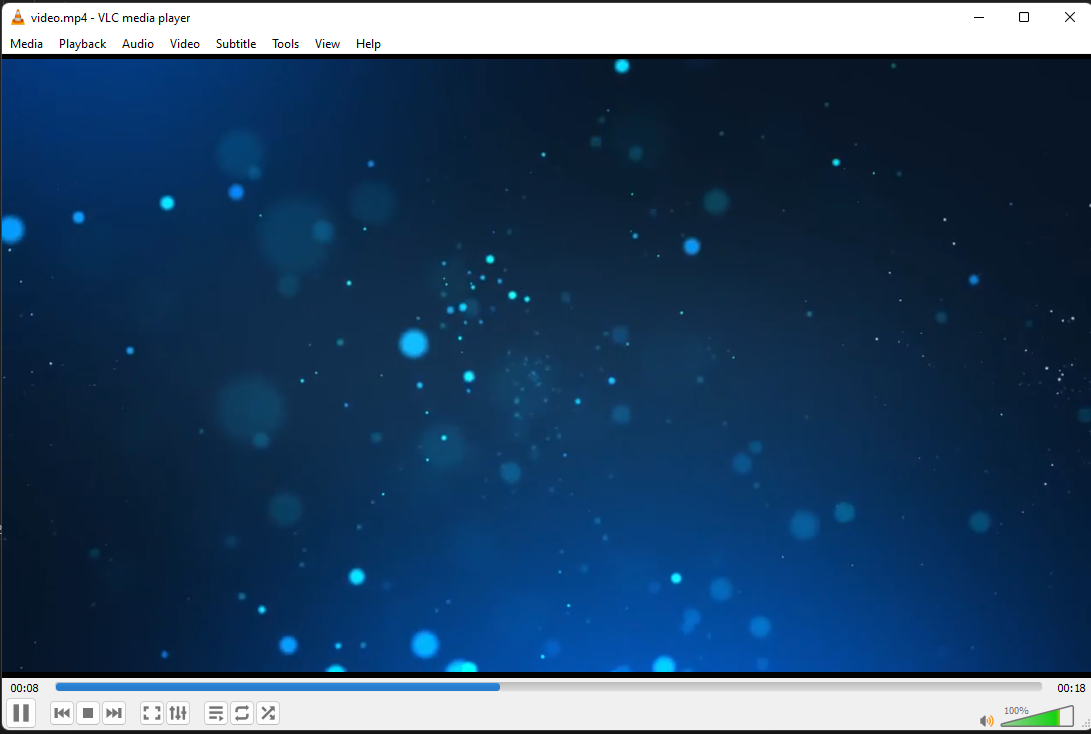

#### Output
```
watermarked_video.mp4
```

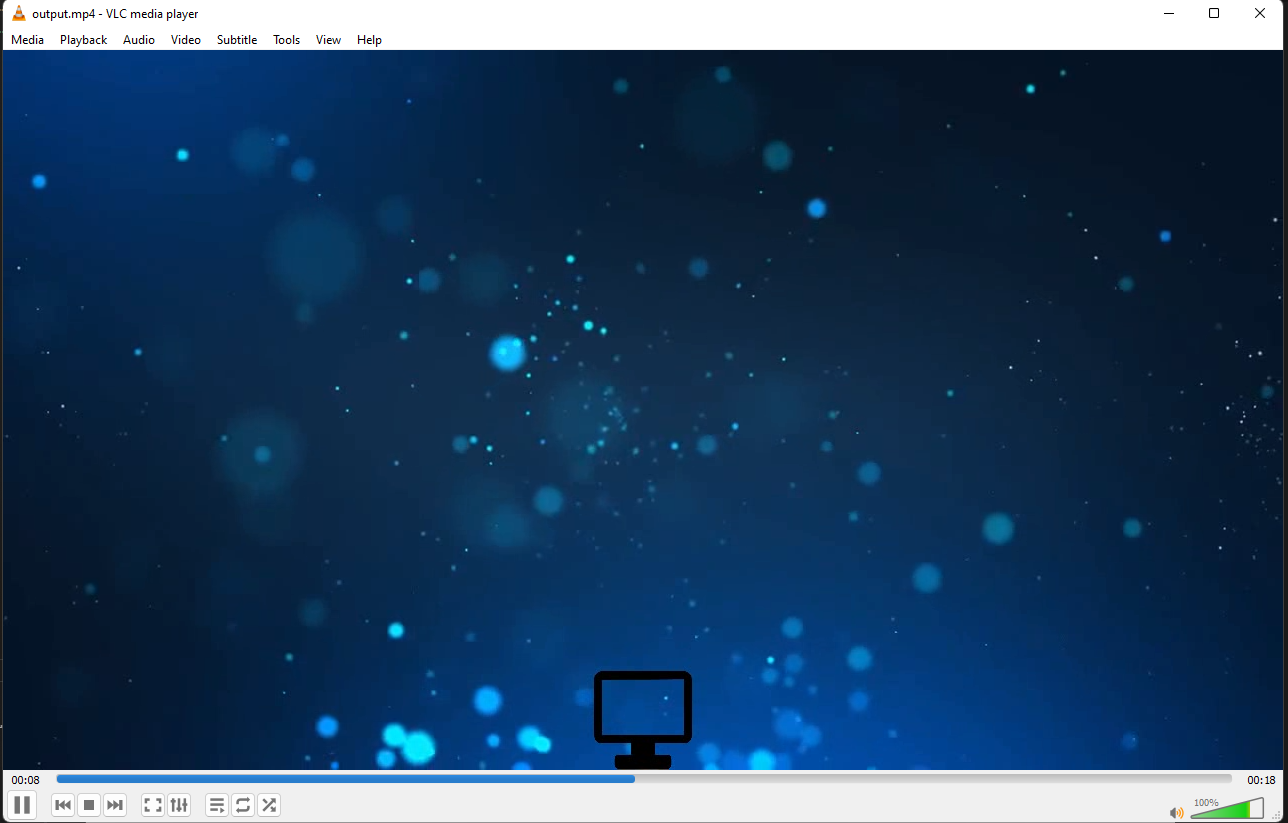

I am glad to share this notebook with you. I hope you find it useful. Please feel free to comment and share your thoughts. Use cases of this technique are welcome. Thank you for reading. This will be used in one of my industrial application for a company i work for. 

### References
1. https://www.pyimagesearch.com/2014/09/15/python-compare-two-images/
2. https://stackoverflow.com/questions/40895785/using-opencv-to-overlay-transparent-image-onto-another-image
3. https://stackoverflow.com/questions/14063070/overlay-a-smaller-image-on-a-larger-image-python-opencv

### Author
```
Name: Mr Ashlin Darius Govindasamy
Email: adg@adgstudios.co.za
```